In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
!python -m spacy download en

2023-12-14 02:20:43.439201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 02:20:43.439280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 02:20:43.439345: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 02:20:43.451662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 02:20:45.007742: W tensorflow/compiler/

In [18]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
import numpy as np # linear algebra4
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# **Extracting reviews from amazon for product Samsung Galaxy a14**


In [7]:
samsung_reviews=[]
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Samsung-Galaxy-Storage-Without-Charger/product-reviews/B0BS17PKHQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    samsung_reviews = samsung_reviews+op

In [8]:
samsung_reviews

["\nUrgent: A14 5G Display Quality Concerns Compared to Competitor's DeviceDear Samsung Customer Support,I hope this message reaches you promptly. I am writing to express my dissatisfaction with the display quality of my recently purchased Samsung A14 5G smartphone. As a dedicated Samsung user, it pains me to report that the display on my A14 5G does not meet the expected standards, especially when compared to a competitor's device, the Redmi 12C.Upon extensive testing, I have observed that the A14 5G's display fails to produce sharp images, notably when streaming YouTube videos. Surprisingly, the Redmi 12C, a device from a different brand, consistently delivers a crisper and more vibrant visual experience.I have ensured that all software and applications are up to date on my Samsung device, and I've taken various measures to optimize the display settings. However, the disparity in image sharpness remains pronounced, and this is a cause for concern.As a loyal Samsung cus\n",
 '\nBatter

In [9]:
reviews = ' '.join(samsung_reviews)

In [10]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower()
reviews = re.sub("[0-9" "]+"," ",reviews).lower()
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()
reviews

' urgent a g display quality concerns compared to competitor s devicedear samsung customer support i hope this message reaches you promptly i am writing to express my dissatisfaction with the display quality of my recently purchased samsung a g smartphone as a dedicated samsung user it pains me to report that the display on my a g does not meet the expected standards especially when compared to a competitor s device the redmi c upon extensive testing i have observed that the a g s display fails to produce sharp images notably when streaming youtube videos surprisingly the redmi c a device from a different brand consistently delivers a crisper and more vibrant visual experience i have ensured that all software and applications are up to date on my samsung device and i ve taken various measures to optimize the display settings however the disparity in image sharpness remains pronounced and this is a cause for concern as a loyal samsung cus battery drain problemdisplay brightness low purc

In [13]:
#Punctuation
no_punc_text = reviews.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

' urgent a g display quality concerns compared to competitor s devicedear samsung customer support i hope this message reaches you promptly i am writing to express my dissatisfaction with the display quality of my recently purchased samsung a g smartphone as a dedicated samsung user it pains me to report that the display on my a g does not meet the expected standards especially when compared to a competitor s device the redmi c upon extensive testing i have observed that the a g s display fails to produce sharp images notably when streaming youtube videos surprisingly the redmi c a device from a different brand consistently delivers a crisper and more vibrant visual experience i have ensured that all software and applications are up to date on my samsung device and i ve taken various measures to optimize the display settings however the disparity in image sharpness remains pronounced and this is a cause for concern as a loyal samsung cus battery drain problemdisplay brightness low purc

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['urgent', 'a', 'g', 'display', 'quality', 'concerns', 'compared', 'to', 'competitor', 's', 'devicedear', 'samsung', 'customer', 'support', 'i', 'hope', 'this', 'message', 'reaches', 'you', 'promptly', 'i', 'am', 'writing', 'to', 'express', 'my', 'dissatisfaction', 'with', 'the', 'display', 'quality', 'of', 'my', 'recently', 'purchased', 'samsung', 'a', 'g', 'smartphone', 'as', 'a', 'dedicated', 'samsung', 'user', 'it', 'pains', 'me', 'to', 'report', 'that', 'the', 'display', 'on', 'my', 'a', 'g', 'does', 'not', 'meet', 'the', 'expected', 'standards', 'especially', 'when', 'compared', 'to', 'a', 'competitor', 's', 'device', 'the', 'redmi', 'c', 'upon', 'extensive', 'testing', 'i', 'have', 'observed', 'that', 'the', 'a', 'g', 's', 'display', 'fails', 'to', 'produce', 'sharp', 'images', 'notably', 'when', 'streaming', 'youtube', 'videos', 'surprisingly', 'the', 'redmi', 'c', 'a', 'device', 'from', 'a', 'different', 'brand', 'consistently', 'delivers', 'a', 'crisper', 'and', 'more', 'vibr

In [21]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in stop_words]
no_stop_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['urgent',
 'g',
 'display',
 'quality',
 'concerns',
 'compared',
 'competitor',
 'devicedear',
 'samsung',
 'customer',
 'support',
 'hope',
 'message',
 'reaches',
 'promptly',
 'writing',
 'express',
 'dissatisfaction',
 'display',
 'quality',
 'recently',
 'purchased',
 'samsung',
 'g',
 'smartphone',
 'dedicated',
 'samsung',
 'user',
 'pains',
 'report',
 'display',
 'g',
 'meet',
 'expected',
 'standards',
 'especially',
 'compared',
 'competitor',
 'device',
 'redmi',
 'c',
 'upon',
 'extensive',
 'testing',
 'observed',
 'g',
 'display',
 'fails',
 'produce',
 'sharp',
 'images',
 'notably',
 'streaming',
 'youtube',
 'videos',
 'surprisingly',
 'redmi',
 'c',
 'device',
 'different',
 'brand',
 'consistently',
 'delivers',
 'crisper',
 'vibrant',
 'visual',
 'experience',
 'ensured',
 'software',
 'applications',
 'date',
 'samsung',
 'device',
 'taken',
 'various',
 'measures',
 'optimize',
 'display',
 'settings',
 'however',
 'disparity',
 'image',
 'sharpness',
 'remains

In [23]:
## Joining all the reviews into single paragraph
no_stop_tokens =" ".join(no_stop_tokens)
no_stop_tokens

'urgent g display quality concerns compared competitor devicedear samsung customer support hope message reaches promptly writing express dissatisfaction display quality recently purchased samsung g smartphone dedicated samsung user pains report display g meet expected standards especially compared competitor device redmi c upon extensive testing observed g display fails produce sharp images notably streaming youtube videos surprisingly redmi c device different brand consistently delivers crisper vibrant visual experience ensured software applications date samsung device taken various measures optimize display settings however disparity image sharpness remains pronounced cause concern loyal samsung cus battery drain problemdisplay brightness low purchased august mobile good areas except battery backup need charge every hrs nothing nice phone price range facing charging issue getting late fully charging also charge decrease quickly samsung never disappoints one frequent user chinese bran

In [24]:
# WordCloud can be performed on the string inputs. That is the reason we have combined
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_stop_tokens)

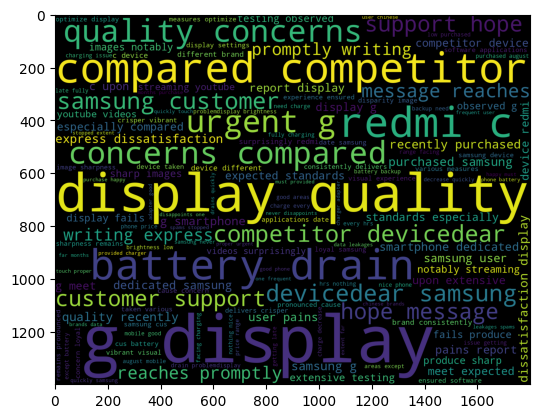

In [25]:
plt.imshow(wordcloud_ip)

# **Emotion Mining**

In [27]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [28]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(samsung_reviews))
red_unique[5:15]

['I am facing  charging  issue getting  to late  for fully  charging  and also charge  decrease quickly\n \nSamsung never disappoints when one is a frequent user of Chinese brands.',
 'All data leakages and spams have stopped to Some extent.',
 'So far after 5 months of purchase am happy.',
 "Must be provided charger/adapter\n \nGood phone, but battery drains quickly\n \nTouch is not proper\n \nUrgent: A14 5G Display Quality Concerns Compared to Competitor's DeviceDear Samsung Customer Support,I hope this message reaches you promptly.",
 'I am writing to express my dissatisfaction with the display quality of my recently purchased Samsung A14 5G smartphone.',
 "As a dedicated Samsung user, it pains me to report that the display on my A14 5G does not meet the expected standards, especially when compared to a competitor's device, the Redmi 12C.Upon extensive testing, I have observed that the A14 5G's display fails to produce sharp images, notably when streaming YouTube videos.",
 "Surpris

In [29]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nUrgent: A14 5G Display Quality Concerns Comp...
1,I am writing to express my dissatisfaction wit...
2,"As a dedicated Samsung user, it pains me to re..."
3,"Surprisingly, the Redmi 12C, a device from a d..."
4,"However, the disparity in image sharpness rema..."
...,...
148,"However, the disparity in image sharpness rema..."
149,I am facing charging issue getting to late ...
150,All data leakages and spams have stopped to So...
151,So far after 5 months of purchase am happy.


In [31]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [32]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [34]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)


Urgent: A14 5G Display Quality Concerns Compared to Competitor's DeviceDear Samsung Customer Support,I hope this message reaches you promptly.
I am writing to express my dissatisfaction with the display quality of my recently purchased Samsung A14 5G smartphone.
As a dedicated Samsung user, it pains me to report that the display on my A14 5G does not meet the expected standards, especially when compared to a competitor's device, the Redmi 12C.Upon extensive testing, I have observed that the A14 5G's display fails to produce sharp images, notably when streaming YouTube videos.
Surprisingly, the Redmi 12C, a device from a different brand, consistently delivers a crisper and more vibrant visual experience.I have ensured that all software and applications are up to date on my Samsung device, and I've taken various measures to optimize the display settings.
However, the disparity in image sharpness remains pronounced, and this is a cause for concern.As a loyal Samsung cus
 
Battery drain p

In [35]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,word,sentiment_value,index
0,\nUrgent: A14 5G Display Quality Concerns Comp...,3,0
1,I am writing to express my dissatisfaction wit...,0,1
2,"As a dedicated Samsung user, it pains me to re...",-2,2
3,"Surprisingly, the Redmi 12C, a device from a d...",4,3
4,"However, the disparity in image sharpness rema...",10,4
...,...,...,...
148,"However, the disparity in image sharpness rema...",10,148
149,I am facing charging issue getting to late ...,-2,149
150,All data leakages and spams have stopped to So...,-3,150
151,So far after 5 months of purchase am happy.,3,151


In [37]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df

,word,sentiment_value,index,word_count
0,\nUrgent: A14 5G Display Quality Concerns Comp...,3,0,19
1,I am writing to express my dissatisfaction wit...,0,1,19
2,"As a dedicated Samsung user, it pains me to re...",-2,2,53
3,"Surprisingly, the Redmi 12C, a device from a d...",4,3,44
4,"However, the disparity in image sharpness rema...",10,4,51
...,...,...,...,...
148,"However, the disparity in image sharpness rema...",10,148,51
149,I am facing charging issue getting to late ...,-2,149,28
150,All data leakages and spams have stopped to So...,-3,150,10
151,So far after 5 months of purchase am happy.,3,151,9


In [38]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,index,word_count
20,"However, the disparity in image sharpness rema...",10,20,51
108,"However, the disparity in image sharpness rema...",10,108,51
52,"However, the disparity in image sharpness rema...",10,52,51
132,"However, the disparity in image sharpness rema...",10,132,51
28,"However, the disparity in image sharpness rema...",10,28,51
116,"However, the disparity in image sharpness rema...",10,116,51
44,"However, the disparity in image sharpness rema...",10,44,51
84,"However, the disparity in image sharpness rema...",10,84,51
140,"However, the disparity in image sharpness rema...",10,140,51
76,"However, the disparity in image sharpness rema...",10,76,51


In [39]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    153.000000
mean       1.986928
std        4.261188
min       -3.000000
25%       -2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: sentiment_value, dtype: float64

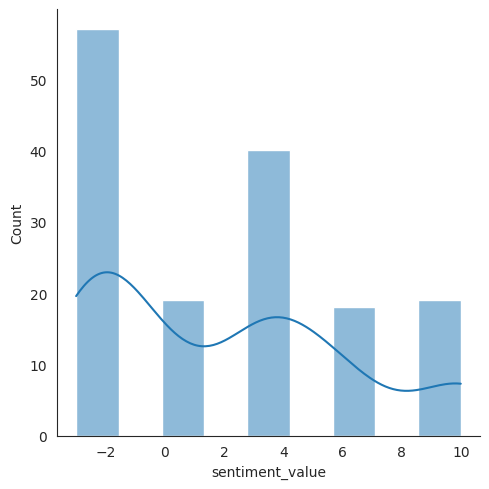

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

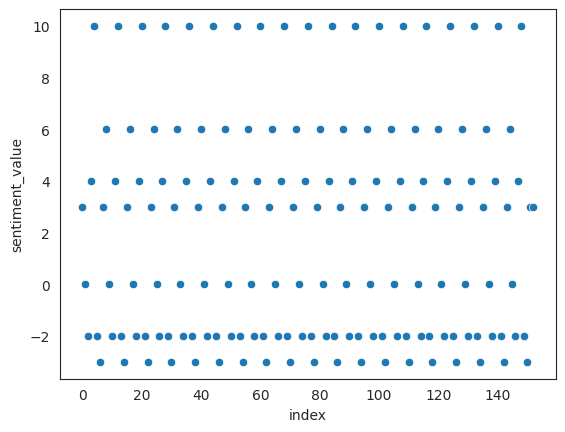

In [41]:
#plt.figure(figsize=(15, 10))
sns.scatterplot(y='sentiment_value',x='index',data=sent_df)

<Axes: xlabel='index', ylabel='sentiment_value'>

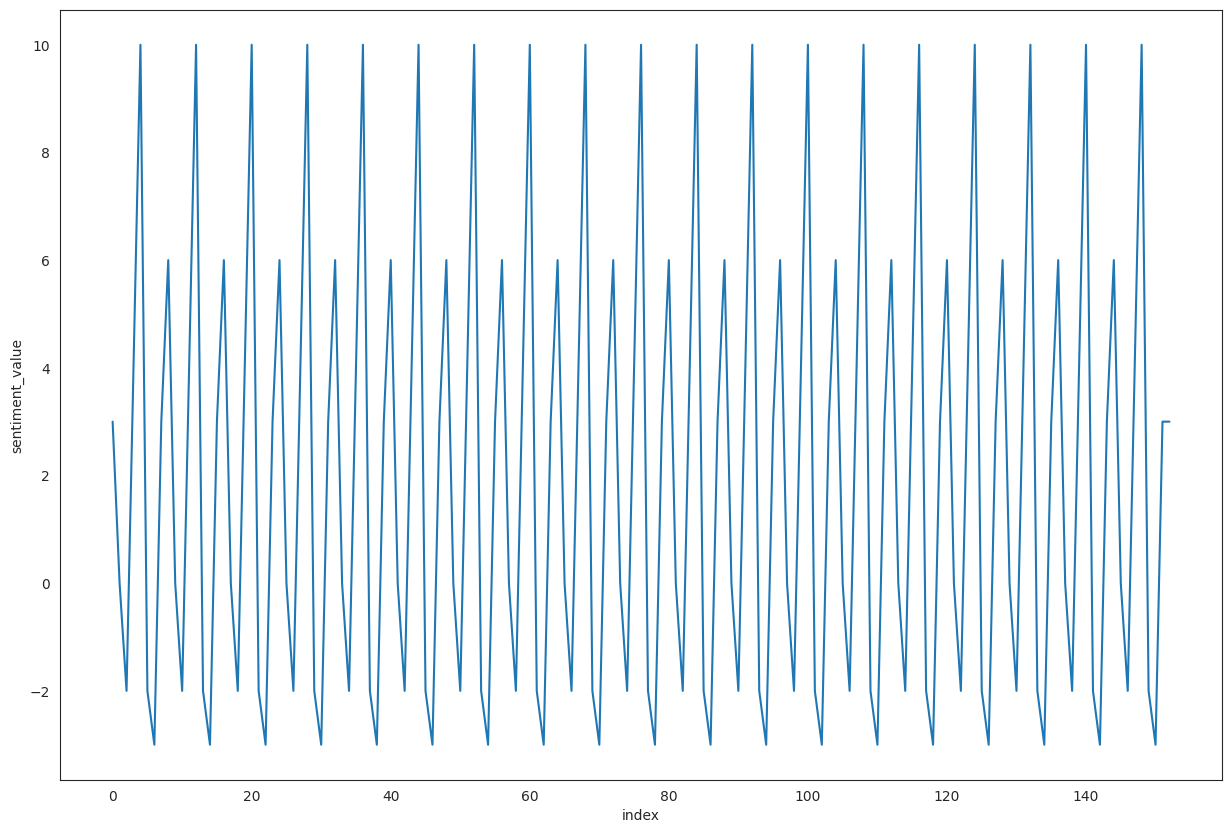

In [42]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)